# Project 2

# Used Vehicle Price Prediction

### Integrantes del Grupo:

* Jorge Enrique Gonzalez Garcia (201920233)
* Daniel Camilo Rojas Arcila (201924286)
* Julian Andrés Velasquez Osorio (201014210)
* Fernando Pérez Moreno (200222809)

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#data = pd.read_csv('../datasets/dataTrain_carListings.zip')
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataTrain_carListings.csv")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.shape

(500000, 6)

In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

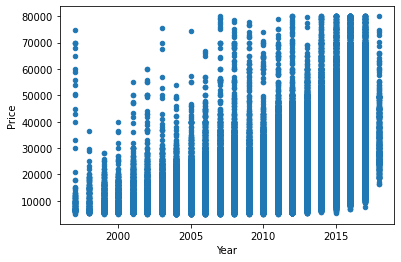

In [6]:
data.plot(kind='scatter', y='Price', x='Year')

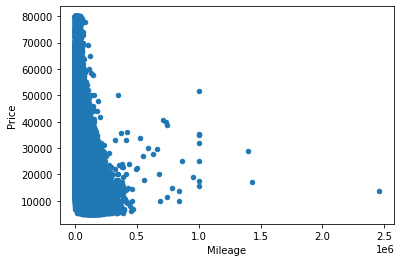

In [7]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [8]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


## Solution

### Transforming the Cathegorical Variables into numbers fro using later in the model

In [9]:
data['State'] = pd.factorize(data.State)[0]
data['Make'] = pd.factorize(data.Make)[0]
data['Model'] = pd.factorize(data.Model)[0]

In [10]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,0,0,0
1,21250,2016,25741,1,1,1
2,20925,2016,24633,2,2,2
3,14500,2012,84026,3,3,3
4,32488,2013,22816,4,3,4


In [11]:
# Convertimos el DataFrame en arreglos numpy.
X_Total = data.drop("Price",axis = 1).to_numpy()
Y_Total = data["Price"].to_numpy()

In [ ]:
data.iloc[samples[0], :]

,Price,Year,Mileage,State,Make,Model
10284,59990,2017,6358,5,26,142
10388,10490,2015,54086,2,5,163
22573,22546,2015,16951,5,8,263
18450,21998,2015,23953,27,10,60
25128,41991,2012,57197,7,18,181
...,...,...,...,...,...,...
30085,6000,2004,206003,39,9,381
11805,16900,2013,25922,14,10,33
13150,26800,2013,42332,20,19,321
25586,14995,2012,67468,19,9,182


In [ ]:
data.sample(frac=1)

,Price,Year,Mileage,State,Make,Model
483658,9566,2008,186332,20,9,404
212833,18400,2017,26945,13,2,2
313444,24200,2017,4924,9,10,351
191196,7995,2009,89715,10,15,71
472999,27995,2014,62735,32,4,5
...,...,...,...,...,...,...
358763,16998,2011,63081,14,0,436
43858,15988,2013,86690,20,1,119
20491,22730,2016,7892,27,8,299
96152,17900,2016,47103,9,7,10


In [ ]:
frac = 0.1
data_sample = data.sample(frac=frac).reset_index(drop=True)
data_sample.head()

In [13]:
data_sample.index

RangeIndex(start=0, stop=50000, step=1)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import numpy as np

#### Random Forest

## Random Forest
Estimating Random Forest models with Manual-Cross Validation. For every k-fold (test, and trainin iteration) we run several tree_regressors (several estimators) on training sets,  and then  predict in test and calculate the error for each one and then save in list:                                                                    
1. We define the range of the k-folds depending of the fraction that we used to take the sample 

2. Second, before doing the k_folds iterations, we define the estimator range for each model, this is from 100 to 400 trees and steps by 100 trees to stimate

3. We define the iterations, first iteration is to do the cross validation, this is taking tests of size (500000*frac) and the rest as train, and iterates over all the index of the sample data, changing the test (not reapeating values) and the respective train

4. The second iteration,  iterates on the estimators or trees, then the random forestRegressor is trained for every tree and then error is caclculated and saved in list for every tree.

In [ ]:
k_fold_range = range(0,int(500000*frac),int(50000*frac))

estimator_range = range(100, 500, 100)
MSE_scores = []

for i in k_fold_range:
  data_test = data_sample.iloc[i:i+int(50000*frac)]
  data_train = data_sample[~data_sample.index.isin(data_test.index)]

  print(data_test.head())
  print(data_test.tail())

  X_train = data_train.drop("Price",axis = 1)
  Y_train = data_train["Price"]

  X_test = data_test.drop("Price",axis = 1)
  Y_test = data_test["Price"]

  for estimator in estimator_range:
        clf = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
        clf.fit(X_train,Y_train)
        y_pred = clf.predict(X_test)
        error = mean_squared_error(Y_test,y_pred)
        print(error)
        MSE_scores.append(error)

   Price  Year  Mileage  State  Make  Model
0  34988  2017    12540     17     4     20
1  31994  2015    33865     27    10     37
2  14736  2014    51988     14     4     18
3  22790  2011    92952     21     9    313
4   5550  2005   149726     14    10     60
      Price  Year  Mileage  State  Make  Model
4995  15888  2015    59262      8     4     73
4996  10000  2013    80791     19     7      3
4997  34988  2016    68539     37     9     82
4998  20988  2016    21806     35     9     35
4999  13995  2013   123507     27     2    283
2586730.421846802
2481069.950960347
2478079.248422195
2455713.9573913654
      Price  Year  Mileage  State  Make  Model
5000  14995  2010    76877     23     0      0
5001  43844  2014    13753     31     8     12
5002  10987  2005    97851     20     3    255
5003  15541  2016    41205     46     3     27
5004   8500  2010   147253     17    15    169
      Price  Year  Mileage  State  Make  Model
9995  21995  2016    15723     30     8     12
9996 

### We have four models given that we ensembled  100 trees in M1,  200 in M2, 300 in M3, and  400 in M4. then in the next code, we are averaging for every Model the sub-models obtained with  10 K folds to get the average MSE 
All this procedure and combination of ensmbles is to find the best model with the lowest MSE posible

In [ ]:
Modelo_1 = (MSE_scores[0]+MSE_scores[4]+MSE_scores[8]+MSE_scores[12]+MSE_scores[16]+MSE_scores[20]+MSE_scores[24]+MSE_scores[28]+MSE_scores[32]+MSE_scores[36])/10
Modelo_2 = (MSE_scores[1]+MSE_scores[5]+MSE_scores[9]+MSE_scores[13]+MSE_scores[17]+MSE_scores[21]+MSE_scores[25]+MSE_scores[29]+MSE_scores[33]+MSE_scores[37])/10
Modelo_3 = (MSE_scores[2]+MSE_scores[6]+MSE_scores[10]+MSE_scores[14]+MSE_scores[18]+MSE_scores[22]+MSE_scores[26]+MSE_scores[30]+MSE_scores[34]+MSE_scores[38])/10
Modelo_4 = (MSE_scores[3]+MSE_scores[7]+MSE_scores[11]+MSE_scores[15]+MSE_scores[19]+MSE_scores[23]+MSE_scores[27]+MSE_scores[31]+MSE_scores[35]+MSE_scores[39])/10
print("Estimators(100): " + str(Modelo_1))
print("Estimators(200): " + str(Modelo_2))
print("Estimators(300): " + str(Modelo_3))
print("Estimators(400): " + str(Modelo_4))

MSE_Finales = []

MSE_Finales.append(Modelo_1)
MSE_Finales.append(Modelo_2)
MSE_Finales.append(Modelo_3)
MSE_Finales.append(Modelo_4)

Estimators(100): 2561567.4944395893
Estimators(200): 2515183.630178678
Estimators(300): 2493048.7629539976
Estimators(400): 2485462.7714800932


[2561567.4944395893, 2515183.630178678, 2493048.7629539976, 2485462.7714800932]

### Graphs of tunning Parameters

### 1. Number of stimators parameter
I n the graph bellow we can see that the more trees we ensemble the lower is the MSE, however from  200 tress onward the improvements become lower at high computational cost. Therefore we have decided to select 200 stimators as the best parameter considering MSE and Computational running constraints.

Text(0, 0.5, 'MSE')

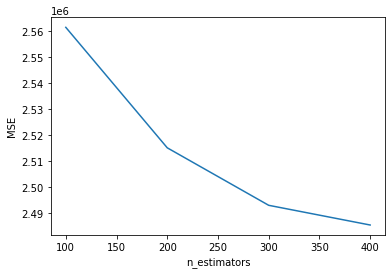

In [ ]:
plt.plot(estimator_range, MSE_Finales)
plt.xlabel('n_estimators')
plt.ylabel('MSE')

### 2. Number of features parameter

We ran Random Forest models again with Manual-Cross Validation, and also we iterate over the # of features in order to stablish the lowest mse. In this case we already set the number of stimators to 200, given the previous result.                         

In [ ]:
k_fold_range = range(0,int(500000*frac),int(50000*frac))

features_range = range(1, 6, 1)
MSE_scores = []

for i in k_fold_range:
  data_test = data_sample.iloc[i:i+int(50000*frac)]
  data_train = data_sample[~data_sample.index.isin(data_test.index)]

  X_train = data_train.drop("Price",axis = 1)
  Y_train = data_train["Price"]

  X_test = data_test.drop("Price",axis = 1)
  Y_test = data_test["Price"]

  for feature in features_range:
        clf = RandomForestRegressor(n_estimators=200,max_features=feature, random_state=1, n_jobs=-1)
        clf.fit(X_train,Y_train)
        y_pred = clf.predict(X_test)
        error = mean_squared_error(Y_test,y_pred)
        print(error)
        MSE_scores.append(error)

3824667.2367045362
2821290.133861934
2549917.3710461464
2471188.8968335106
2450361.6365424544
4374831.0291042095
3304317.1720295986
2906481.8931846665
2783324.7869139994
2755783.5901717977
3859138.8865078324
2860010.4668455445
2508286.1304983133
2400528.7713947115
2373005.307276097
4222247.704965105
3102861.231540103
2686870.950731549
2572463.1572822183
2540759.2084284197
4055708.467481427
2952855.705550758
2586130.052046328
2466985.4683663757
2410050.388684171
4264297.94888082
3088713.637077918
2677023.8278421303
2571696.503165539
2544731.307863405
4047485.818346733
2919562.317529469
2546037.9735200224
2427002.500762571
2402447.428785653
4008102.6032971693
2999749.648012864
2643191.2705863863
2496498.6384413247
2473336.6074569793
4479552.849408795
3163552.744601661
2698840.199213311
2534714.754700357
2519169.7184692114
4072322.147608262
2972795.6586914505
2594684.104745403
2487007.080749043
2433124.82398205


In [ ]:
Modelo_1 = (MSE_scores[0]+MSE_scores[5]+MSE_scores[10]+MSE_scores[15]+MSE_scores[20]+MSE_scores[25]+MSE_scores[30]+MSE_scores[35]+MSE_scores[40]+MSE_scores[45])/10
Modelo_2 = (MSE_scores[1]+MSE_scores[6]+MSE_scores[11]+MSE_scores[16]+MSE_scores[21]+MSE_scores[26]+MSE_scores[31]+MSE_scores[36]+MSE_scores[41]+MSE_scores[46])/10
Modelo_3 = (MSE_scores[2]+MSE_scores[7]+MSE_scores[12]+MSE_scores[17]+MSE_scores[22]+MSE_scores[27]+MSE_scores[32]+MSE_scores[37]+MSE_scores[42]+MSE_scores[47])/10
Modelo_4 = (MSE_scores[3]+MSE_scores[8]+MSE_scores[13]+MSE_scores[18]+MSE_scores[23]+MSE_scores[28]+MSE_scores[33]+MSE_scores[38]+MSE_scores[43]+MSE_scores[48])/10
Modelo_5 = (MSE_scores[4]+MSE_scores[9]+MSE_scores[14]+MSE_scores[19]+MSE_scores[24]+MSE_scores[29]+MSE_scores[34]+MSE_scores[39]+MSE_scores[44]+MSE_scores[49])/10
print("Features(1): " + str(Modelo_1))
print("Features(2): " + str(Modelo_2))
print("Features(3): " + str(Modelo_3))
print("Features(4): " + str(Modelo_4))
print("Features(5): " + str(Modelo_5))

MSE_Finales = []

MSE_Finales.append(Modelo_1)
MSE_Finales.append(Modelo_2)
MSE_Finales.append(Modelo_3)
MSE_Finales.append(Modelo_4)
MSE_Finales.append(Modelo_5)

Features(1): 4120835.4692304893
Features(2): 3018570.87157413
Features(3): 2639746.377341426
Features(4): 2521141.055860965
Features(5): 2490277.001766023


### The lowest MSE is found with 5 features which is the total features we have in the original data. In this case we can set this parameter to 4, even thout is lower with 5, the improvement is not significant. 

Text(0, 0.5, 'MSE')

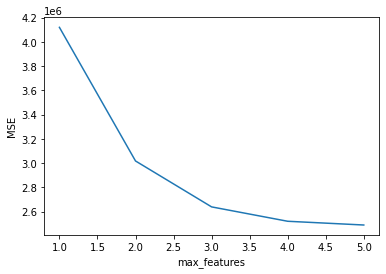

In [ ]:
plt.plot(features_range, MSE_Finales)
plt.xlabel('max_features')
plt.ylabel('MSE')

### 3. Max_depth parameter
Now taking the best parameter values from the previous tuning (iterators =200, and features =4), we now do tunning changing the max_depth, this is related to the levels of the tree to be grown.

In [27]:
k_fold_range = range(0,int(500000*frac),int(50000*frac))

depth_range = range(1, 21, 1)
MSE_scores = []

for i in k_fold_range:
  data_test = data_sample.iloc[i:i+int(50000*frac)]
  data_train = data_sample[~data_sample.index.isin(data_test.index)]

  X_train = data_train.drop("Price",axis = 1)
  Y_train = data_train["Price"]

  X_test = data_test.drop("Price",axis = 1)
  Y_test = data_test["Price"]
  row = []
  for depth in depth_range:
        clf = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=depth, random_state=1, n_jobs=-1)
        clf.fit(X_train,Y_train)
        y_pred = clf.predict(X_test)
        error = mean_squared_error(Y_test,y_pred)
        #print(error)
        row.append(error)
        #print(row)
  MSE_scores.append(row)
  print(MSE_scores)

[[90323392.31823471, 81952879.47768448, 74492487.79627362, 69585737.75720261, 64910693.62918584, 60281863.276908726, 54195390.293495625, 48403206.922997974, 42210353.61416862, 36369603.75299126, 31269901.474264257, 27090071.293607637, 24152892.40351928, 21860988.030150007, 20341700.517774466, 19539419.63742041, 19016388.58433986, 18658281.601286203, 18456473.419125587, 18374020.62181946]]
[[90323392.31823471, 81952879.47768448, 74492487.79627362, 69585737.75720261, 64910693.62918584, 60281863.276908726, 54195390.293495625, 48403206.922997974, 42210353.61416862, 36369603.75299126, 31269901.474264257, 27090071.293607637, 24152892.40351928, 21860988.030150007, 20341700.517774466, 19539419.63742041, 19016388.58433986, 18658281.601286203, 18456473.419125587, 18374020.62181946], [91894011.18408735, 82057520.21102813, 73146469.29634489, 67244329.01114611, 62462136.510800295, 57878518.15941321, 51813990.48471905, 46038182.8334108, 39763525.84122743, 34345299.751948275, 29682914.316744618, 2561

In [31]:
df_MSE = pd.DataFrame(MSE_scores, columns=['Modelo_1', 'Modelo_2','Modelo_3','Modelo_4','Modelo_5','Modelo_6','Modelo_7','Modelo_8','Modelo_9','Modelo_10',
                                           'Modelo_11','Modelo_12','Modelo_13','Modelo_14','Modelo_15','Modelo_16','Modelo_17','Modelo_18','Modelo_19','Modelo_20'])

df_MSE.mean(axis=0)

Modelo_1     9.079743e+07
Modelo_2     8.168200e+07
Modelo_3     7.374845e+07
Modelo_4     6.859855e+07
Modelo_5     6.380518e+07
Modelo_6     5.882909e+07
Modelo_7     5.257118e+07
Modelo_8     4.666104e+07
Modelo_9     4.062233e+07
Modelo_10    3.506655e+07
Modelo_11    3.033331e+07
Modelo_12    2.641355e+07
Modelo_13    2.353532e+07
Modelo_14    2.146632e+07
Modelo_15    2.006749e+07
Modelo_16    1.920604e+07
Modelo_17    1.866214e+07
Modelo_18    1.833242e+07
Modelo_19    1.817302e+07
Modelo_20    1.806614e+07
dtype: float64

### The number of levels we are going to set for our final model, is max_depth =15. 
We can have lower MSE at 20 levels, however the improvement is not significant if we take on count the computational cost, 

Text(0, 0.5, 'MSE')

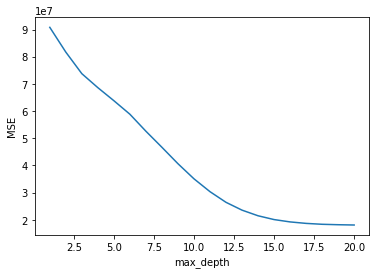

In [34]:
plt.plot(depth_range, df_MSE.mean(axis=0))
plt.xlabel('max_depth')
plt.ylabel('MSE')

#### Running the tree with the best parameters found prevously. 
(number of statimators =200, features = 4, max depth = 15)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Total, Y_Total, test_size=0.70, random_state=1)

clf_VF = RandomForestRegressor(n_estimators=200, max_features=4, max_depth = 15, random_state=1, n_jobs=-1)
clf_VF.fit(X_train,y_train)
Y_Pred = clf_VF.predict(X_test) 

In [38]:
error = mean_squared_error(Y_Pred,y_test)
print("MSE :" + str(error))
print("RMSE :" + str(np.sqrt(error)))

MSE :17214889.53517118
RMSE :4149.082975209242


#### Importance of variables
- we can see that most important variable is Model, followed by  year, Which make sense for stablishing the priceof a vehicle

In [39]:
# compute feature importances
feature_cols = data.drop("Price",axis = 1).columns
pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
2,State,0.041771
1,Mileage,0.166046
3,Make,0.197011
0,Year,0.239963
4,Model,0.355209


# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine


## Save the Model
The following commands save the Random Forest Reggression Model  in a format .aaa, than we later change from the file directly to format .pkl.
The compress is reducing the size of the file as much as posible so it can be loaded in git-hub


In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(clf_VF, 'price_forecast.aaaa', compress=9)

## Initial parameter as input to create the model

In [2]:
import pandas as pd
from sklearn.externals import joblib
import sys
import os

C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
Model="Mazda34dr"
Make="Mazda"
Mileage=15000
Year=2014
State="MD"

In [4]:
d = {'Model':[Model], 'Make': [Make], 'Mileage': [Mileage], 'Year': [Year], 'State': [State]}
DF = pd.DataFrame(data=d)
DF

,Model,Make,Mileage,Year,State
0,Mazda34dr,Mazda,15000,2014,MD


##  Importing the model which was defined in a .py file, this file is in the repository called  as ModelDeployment1

In [6]:
from ModelDeployment1 import PredictPrice

ModuleNotFoundError: No module named 'ModelDeployment1'

### Part 3: Create the API
Stablishing the entry arguments, which in our case are the 5 features required to predict

In [ ]:
from flask import Flask
from flask_restx import Api, Resource, fields
from sklearn.externals import joblib

app = Flask(__name__)

api = Api(
    app, 
    version='1.0', 
    title='Predicting Price',
    description='Predicting Price')

ns = api.namespace('predict', 
     description='Predicting Price')
   
parser = api.parser()

parser.add_argument(
    'Model', 
    type=str, 
    required=True, 
    help='type Model', 
    location='args')

parser.add_argument(
    'Make', 
    type=str, 
    required=True, 
    help='Type make', 
    location='args')

parser.add_argument(
    'Mileage', 
    type=int, 
    required=True, 
    help='Type mileage', 
    location='args')

parser.add_argument(
    'Year', 
    type=int, 
    required=True, 
    help='Type year', 
    location='args')


parser.add_argument(
    'State', 
    type=str, 
    required=True, 
    help='type State', 
    location='args')

resource_fields = api.model('Resource', {
    'result': fields.String,
})

##### Load model and create function that predicts the price of the vehicle

In [ ]:
@ns.route('/')
class PredictingPrice(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()
        
        Model = args['Model']
        Make = args['Make']
        Mileage = args['Mileage']
        Year = args['Year']
        State = args['State']
        
        #DF = DF.split('%3B')
        print(DF)
        
        return {
         "result": PredictPrice(Model, Make, Mileage, Year, State)
        }, 200

Runing the API

In [ ]:
app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)